## Introduction
* The problem we are working on is Structured data.
* We have to build machine learning model to predict whether the applicant is eligible for loan

## Importing Libraries 

In [520]:
import pandas as pd
import numpy as np
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder ,OrdinalEncoder





## Data analyzing

In [448]:
df = pd.read_csv("Demo_Data_Loan.csv")
df.tail(300)


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
67,LP001358,Male,Yes,0,Graduate,No,3445,0,130.0,360.0,0.0,Semiurban
68,LP001359,Male,Yes,0,Graduate,No,7666,0,187.0,360.0,1.0,Semiurban
69,LP001361,Male,Yes,0,Graduate,No,2458,5105,188.0,360.0,0.0,Rural
70,LP001366,Female,No,NaN,Graduate,No,3250,0,95.0,360.0,1.0,Semiurban
71,LP001368,Male,No,0,Graduate,No,4463,0,65.0,360.0,1.0,Semiurban
...,...,...,...,...,...,...,...,...,...,...,...,...
362,LP002971,Male,Yes,3+,Not Graduate,Yes,4009,1777,113.0,360.0,1.0,Urban
363,LP002975,Male,Yes,0,Graduate,No,4158,709,115.0,360.0,1.0,Urban
364,LP002980,Male,No,0,Graduate,No,3250,1993,126.0,360.0,NaN,Semiurban
365,LP002986,Male,Yes,0,Graduate,No,5000,2393,158.0,360.0,1.0,Rural


In [449]:
df.isna().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [450]:
df.shape

(367, 12)

In [451]:
df.info(
)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      344 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


In [452]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,367.000000,367.000000,362.000000,361.000000,338.000000
mean,4805.599455,1569.577657,136.132597,342.537396,0.825444
std,4910.685399,2334.232099,61.366652,65.156643,0.380150
min,0.000000,0.000000,28.000000,6.000000,0.000000
25%,2864.000000,0.000000,100.250000,360.000000,1.000000
50%,3786.000000,1025.000000,125.000000,360.000000,1.000000
75%,5060.000000,2430.500000,158.000000,360.000000,1.000000
max,72529.000000,24000.000000,550.000000,480.000000,1.000000


In [453]:
df.mean()

C:\Users\sajid_f57ovgd\AppData\Local\Temp\ipykernel_22988\3698961737.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.mean()


ApplicantIncome      4805.599455
CoapplicantIncome    1569.577657
LoanAmount            136.132597
Loan_Amount_Term      342.537396
Credit_History          0.825444
dtype: float64

In [454]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [455]:
pd.crosstab(df["LoanAmount"],df["Credit_History"])

Credit_History,0.0,1.0
LoanAmount,,
28.0,0,2
30.0,0,1
35.0,0,1
40.0,0,2
46.0,0,1
...,...,...
336.0,0,1
360.0,0,1
390.0,0,1


<AxesSubplot:>

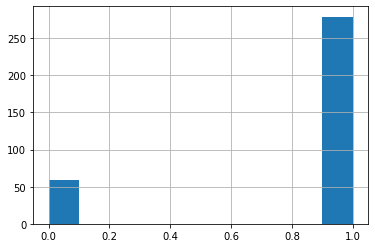

In [456]:
df["Credit_History"].hist(
)


In [457]:
df.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

## Lets fill the missing value

In [458]:
df['Gender'].fillna(df['Gender'].mode()[0],inplace=True)
df['Married'].fillna(df['Married'].mode()[0],inplace=True)
df['Dependents'].fillna(df['Dependents'].mode()[0],inplace=True)
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0],inplace=True)
df['Credit_History'].fillna(df['Credit_History'].mode()[0],inplace=True)
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0],inplace=True)

In [459]:
df['LoanAmount'].fillna(df['LoanAmount'].mean(),inplace=True)

In [460]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

In [461]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,1.0,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [462]:
# Again lets explore some of the data set and plot them

df.Loan_ID.value_counts(dropna=True)

LP001015    1
LP002389    1
LP002383    1
LP002376    1
LP002375    1
           ..
LP001627    1
LP001622    1
LP001613    1
LP001611    1
LP002989    1
Name: Loan_ID, Length: 367, dtype: int64

In [463]:
df.Gender.value_counts(dropna=True)

Male      297
Female     70
Name: Gender, dtype: int64

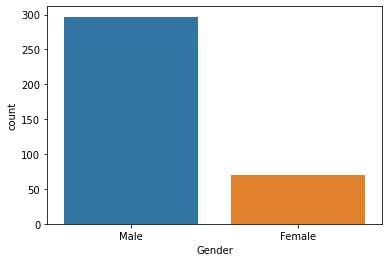

In [464]:
sns.countplot(x = "Gender",data = df )
plt.show()

In [465]:
df.Married.value_counts(dropna=True)


Yes    233
No     134
Name: Married, dtype: int64

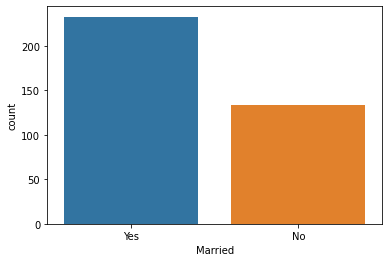

In [466]:
sns.countplot(x= "Married",data =df)
plt.show()

In [467]:
df.Education.value_counts(dropna=True)


Graduate        283
Not Graduate     84
Name: Education, dtype: int64

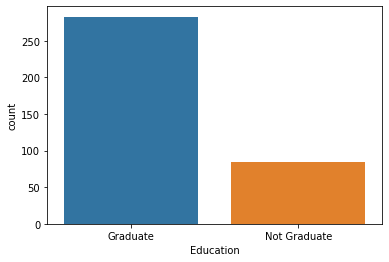

In [468]:
sns.countplot(x= "Education",data = df)
plt.show()

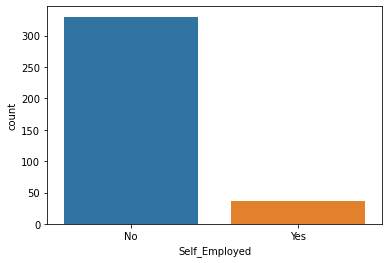

In [469]:
df.Self_Employed.value_counts(dropna=True)
sns.countplot(x = "Self_Employed",data =df)
plt.show()

In [470]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,1.0,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [471]:
df.Credit_History.value_counts(dropna=True)

1.0    308
0.0     59
Name: Credit_History, dtype: int64

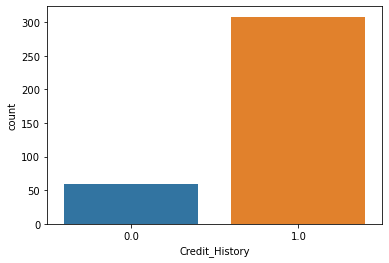

In [472]:
sns.countplot(x = "Credit_History", data= df)
plt.show()

In [473]:
df.Property_Area.value_counts(dropna  = True)


Urban        140
Semiurban    116
Rural        111
Name: Property_Area, dtype: int64

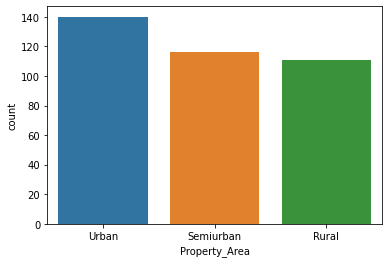

In [474]:
sns.countplot(x = "Property_Area", data = df)
plt.show(
)

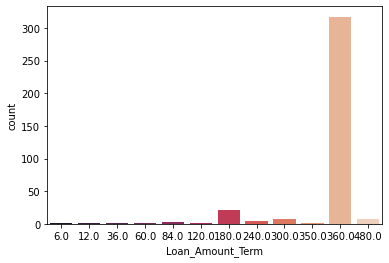

In [475]:
sns.countplot(x="Loan_Amount_Term", data=df, palette="rocket")
plt.show()

In [476]:
df[['ApplicantIncome','CoapplicantIncome','LoanAmount']].describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount
count,367.000000,367.000000,367.000000
mean,4805.599455,1569.577657,136.132597
std,4910.685399,2334.232099,60.946040
min,0.000000,0.000000,28.000000
25%,2864.000000,0.000000,101.000000
50%,3786.000000,1025.000000,126.000000
75%,5060.000000,2430.500000,157.500000
max,72529.000000,24000.000000,550.000000


###  Lets make a correlation mattrix and  plot Heatmap

In [477]:
df.corr()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
ApplicantIncome,1.000000,-0.110335,0.490174,0.023319,0.094944
CoapplicantIncome,-0.110335,1.000000,0.150112,-0.008633,-0.058004
LoanAmount,0.490174,0.150112,1.000000,0.093476,-0.013201
Loan_Amount_Term,0.023319,-0.008633,0.093476,1.000000,-0.048189
Credit_History,0.094944,-0.058004,-0.013201,-0.048189,1.000000


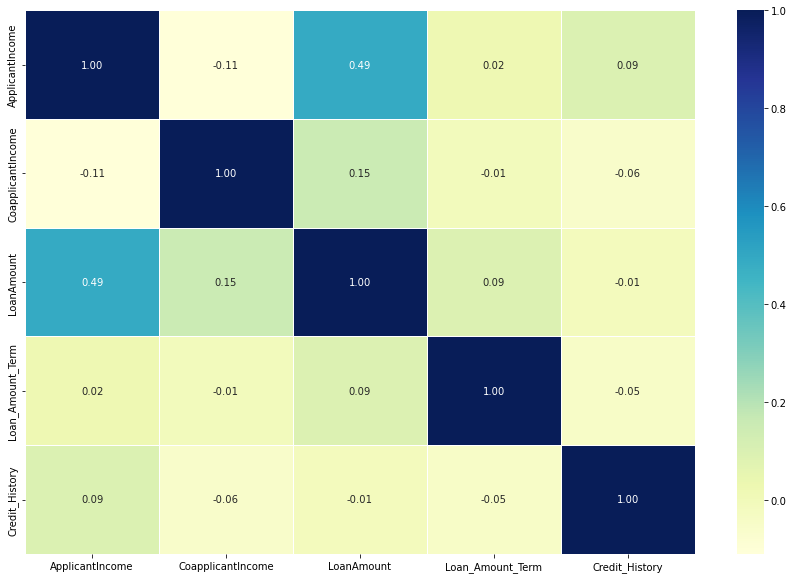

In [478]:

## Lets make correlation  prettier
corr_matrix = df.corr()
fig , ax  = plt.subplots(figsize =(15,10))
ax = sns.heatmap(corr_matrix,
                annot=True,
                 linewidths=0.5,
                 fmt =".2f",
                 cmap= "YlGnBu" 
                    );

In [479]:
df.head()


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,1.0,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [480]:
df["Total_income"] = df["ApplicantIncome"] + df["CoapplicantIncome"]
df["Total_income_log"] = np.log(df["Total_income"])

<AxesSubplot:>

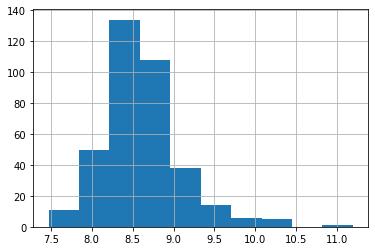

In [481]:
df["Total_income_log"].hist()

In [482]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Total_income,Total_income_log
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban,5720,8.651724
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban,4576,8.428581
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban,6800,8.824678
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,1.0,Urban,4886,8.494129
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban,3276,8.094378


In [486]:
# Now selection of Column

X=df.iloc[:,np.r_[1:5,6:12]]
y=df.iloc[:,5]


In [488]:
X

,Gender,Married,Dependents,Education,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,Male,Yes,0,Graduate,5720,0,110.0,360.0,1.0,Urban
1,Male,Yes,1,Graduate,3076,1500,126.0,360.0,1.0,Urban
2,Male,Yes,2,Graduate,5000,1800,208.0,360.0,1.0,Urban
3,Male,Yes,2,Graduate,2340,2546,100.0,360.0,1.0,Urban
4,Male,No,0,Not Graduate,3276,0,78.0,360.0,1.0,Urban
...,...,...,...,...,...,...,...,...,...,...
362,Male,Yes,3+,Not Graduate,4009,1777,113.0,360.0,1.0,Urban
363,Male,Yes,0,Graduate,4158,709,115.0,360.0,1.0,Urban
364,Male,No,0,Graduate,3250,1993,126.0,360.0,1.0,Semiurban
365,Male,Yes,0,Graduate,5000,2393,158.0,360.0,1.0,Rural


In [489]:
y

0       No
1       No
2       No
3       No
4       No
      ... 
362    Yes
363     No
364     No
365     No
366    Yes
Name: Self_Employed, Length: 367, dtype: object

## Splitting the data set

In [490]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [491]:
print(X_train)

     Gender Married Dependents     Education  ApplicantIncome  \
63   Female      No          0      Graduate             2101   
241    Male     Yes          0      Graduate             3887   
306    Male     Yes          2      Graduate             7500   
317    Male     Yes          0  Not Graduate             1700   
245    Male     Yes          0      Graduate             3186   
..      ...     ...        ...           ...              ...   
323    Male      No          1      Graduate            16000   
192    Male     Yes          2  Not Graduate             3785   
117    Male     Yes          1      Graduate             1516   
47     Male      No          0  Not Graduate             2356   
172    Male     Yes          0      Graduate             5225   

     CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_History  \
63                1500       108.0             360.0             0.0   
241               1517       105.0             360.0             0.0   
306

In [492]:
y_train

63      No
241     No
306    Yes
317     No
245     No
      ... 
323     No
192     No
117     No
47      No
172     No
Name: Self_Employed, Length: 293, dtype: object

In [517]:
s = (X_train.dtypes == 'object')
object_cols = list(s[s].index)


print(object_cols)

[]


In [509]:

    

# Apply Ordinal encoder to each column with categorical data
ordinal_encoder = OrdinalEncoder()
X_train[object_cols] = ordinal_encoder.fit_transform(X_train[object_cols])
X_test[object_cols] = ordinal_encoder.transform(X_test[object_cols])

In [518]:

#apply encoder on y split variables
label_encoder = LabelEncoder()
y_train =  label_encoder.fit_transform(y_train)
y_test =  label_encoder.fit_transform(y_test)

In [519]:
X_train["Education"]

63     0.0
241    0.0
306    0.0
317    1.0
245    0.0
      ... 
323    0.0
192    1.0
117    0.0
47     1.0
172    0.0
Name: Education, Length: 293, dtype: float64

## Modeling

In [514]:
# Put the model in Dictionary
models = {"Logistic Regression": LogisticRegression(),
         "KNNC": KNeighborsClassifier(),
         "Random forest Classifier": RandomForestClassifier()}
# Create a function  to fit and model score
def fit_and_score(models,X_train,X_test,y_train,y_test):
    
    
    #set random seed
    np.random.seed(42)
    # Make a dictionary to keep model score
    model_scores ={}
    # loop through the model
    for name , model in models.items():
        # Fit the model to data
        model.fit(X_train,y_train)
        # evaluate the model and append its score to model score
        model_scores[name]= model.score(X_test ,y_test)
    return model_scores    
    

In [515]:
model_scores = fit_and_score(models = models,X_train= X_train,X_test=X_test,y_train=y_train,y_test=y_test)

model_scores

C:\Users\sajid_f57ovgd\Desktop\Loan_Data\env\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.8783783783783784,
 'KNNC': 0.8648648648648649,
 'Random forest Classifier': 0.8783783783783784}

### Model Comparision

<AxesSubplot:>

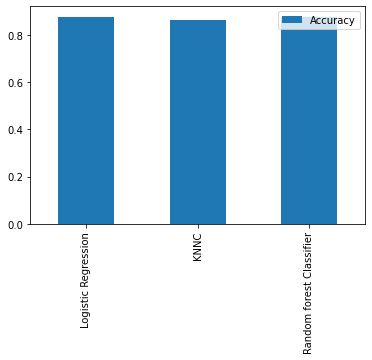

In [516]:
model_compare = pd.DataFrame(model_scores,index=["Accuracy"])
model_compare.T.plot.bar()

## As per we can see that Logistic regression and KNCC performing the same accuracy